**1. Import Dataset**

In [4]:
#Download dataset from: https://drive.google.com/file/d/1xu_xdVySieNg1vjqPskRyGSARA-YDK1N/view?usp=sharing
!gdown --id 1xu_xdVySieNg1vjqPskRyGSARA-YDK1N

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xu_xdVySieNg1vjqPskRyGSARA-YDK1N
To: /content/database.txt
100% 1.90M/1.90M [00:00<00:00, 185MB/s]


In [5]:
import pymc as pm
import numpy as np
import arviz as az
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import scipy

import matplotlib.pyplot  as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from datetime import datetime

import scipy.io

In [6]:
file_path = 'database.txt'
datt = pd.read_fwf(file_path, header=None)
datt

,0,1,2,3,4,5,6,7,8,9,...,979,980,981,982,983,984,985,986,987,988
0,1.00,1.00,1.00,1.00,0.97,0.97,0.96,0.96,0.96,0.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.99,0.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.00,1.00,0.99,0.99,0.99,0.98,0.98,0.94,0.94,0.92,...,0.98,0.99,0.99,1.00,1.00,NaN,NaN,NaN,NaN,NaN
3,1.00,1.00,1.00,0.99,0.99,0.98,0.98,0.98,0.98,0.98,...,0.95,0.95,0.96,0.96,0.97,0.98,0.98,0.99,1.00,1.00
4,1.00,1.00,0.99,0.99,0.99,0.99,0.98,0.98,0.98,0.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,1.00,1.00,0.99,0.98,0.98,0.98,0.97,0.96,0.96,0.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,1.00,0.99,0.99,0.99,0.99,0.99,0.98,0.98,0.98,0.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,1.00,1.00,1.00,0.99,0.99,0.95,0.95,0.95,0.94,0.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
datt.shape

(377, 989)

In [8]:
print(datt.values)

[[1.     1.     0.9957 ...    nan    nan    nan]
 [1.     1.     1.     ...    nan    nan    nan]
 [1.     0.9962 0.9925 ...    nan    nan    nan]
 ...
 [1.     1.     1.     ...    nan    nan    nan]
 [1.     0.9953 1.     ...    nan    nan    nan]
 [1.     0.9873 0.9831 ...    nan    nan    nan]]


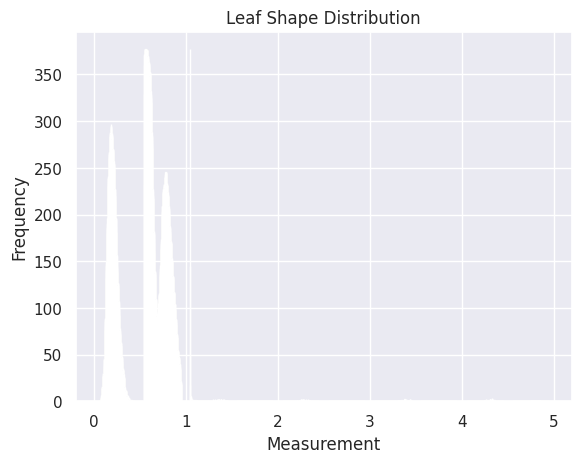

In [9]:
data = datt.values

plt.hist(data)
plt.title('Leaf Shape Distribution')
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.show()

Gaussian interference

([<matplotlib.axis.YTick at 0x7fea1f43baf0>], [Text(0, 0, '0')])

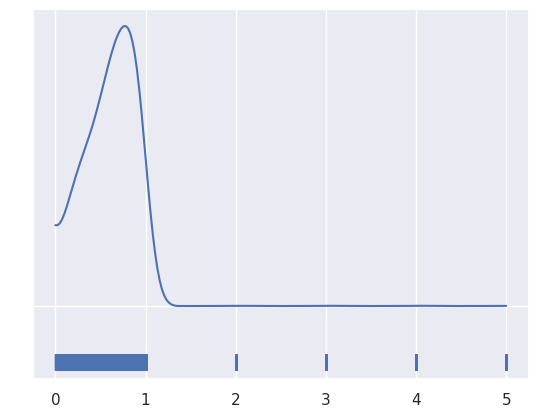

In [10]:
%matplotlib inline

az.plot_kde(data, rug=True)
plt.yticks([0], alpha=0)

In [12]:
print('Running on PyMC v{}'.format(pm.__version__))

Running on PyMC v5.1.2


In [ ]:
with pm.Model() as model:
    mu = pm.Uniform('mu', lower=0, upper=300) #Use any prior knowledge 
    sigma = pm.HalfNormal('sigma')
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    
    trace = pm.sample(1000, tune=1000)

/usr/local/lib/python3.9/dist-packages/pymc/model.py:1402: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


plot graph